# Challenge

## WADE El Hadji Malick

In [19]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
import math
from random import *


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, matthews_corrcoef, accuracy_score, roc_auc_score,roc_curve

# On ignore les avertissements des classes de modéles
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# On sauvegarde nos modéles finales
from sklearn.externals import joblib # save and load models

# # save the model to disk
# filename = 'modeles/SVM'
# joblib.dump(SVM, filename)

# # load the model from disk
# loaded_model = joblib.load(filename)

## 1. Chargement et Data preprocessing

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_Home = "/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/donnees_challenge"
#path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension"

Xtrainchallenge = pd.read_csv(path_Home + "/Xtrainchallenge.txt",  sep=' ')
Ytrainchallenge = pd.read_csv(path_Home + "/Ytrainchallenge.txt",  sep=' ')

Xtestchallenge = pd.read_csv(path_Home + "/Xtestchallenge.txt",  sep=' ')

In [3]:
print("Données Train:")
print ("Lignes: " ,Xtrainchallenge.shape[0])
print ("Colonnes: " ,Xtrainchallenge.shape[1])

print("----")

print("Données Test:")
print ("Lignes: " ,Xtestchallenge.shape[0])
print ("Colonnes: " ,Xtestchallenge.shape[1])

Données Train:
Lignes:  1000
Colonnes:  500
----
Données Test:
Lignes:  1000
Colonnes:  500


In [4]:
Xtrainchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [5]:
Xtestchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1001,482,538,473,485,576,479,489,477,473,479,495,527,439,485,465,523,477,466,502,478,479,466,484,481,492,465,478,481,469,488,472,551,521,536,472,510,499,513,475,476,476,476,507,493,523,446,492,513,498,452,601,482,476,478,524,473,461,501,588,466,487,487,491,483,453,544,504,477,484,477,520,494,492,475,476,522,474,471,461,487,511,524,409,467,510,517,474,478,483,561,476,460,457,527,483,543,484,449,484,498,466,478,482,477,480,462,473,558,535,485,490,491,482,473,530,493,463,489,488,473,477,484,486,505,437,497,501,499,476,435,476,490,473,475,427,513,505,475,480,476,496,527,489,479,464,495,477,510,485,512,430,489,465,432,476,498,503,448,481,469,476,480,488,477,485,492,475,482,475,545,478,554,422,479,475,444,501,479,486,497,508,513,478,487,499,474,499,493,489,471,486,494,486,444,525,478,471,484,476,484,519,498,527,555,498,474,473,481,467,478,511,467,470,485,481,501,549,473,532,484,447,539,510,535,522,463,492,477,477,493,490,481,471,485,445,519,502,473,469,489,485,562,458,464,540,482,463,472,475,529,508,499,482,503,477,438,487,423,491,512,485,479,485,443,485,502,447,517,551,504,495,517,510,512,469,499,476,522,468,419,476,439,460,475,537,471,502,544,483,469,478,537,541,474,489,532,507,489,484,483,480,491,475,463,512,477,463,487,510,459,491,478,559,493,462,462,470,471,449,466,483,494,489,489,484,483,465,489,482,538,532,470,476,491,571,487,422,546,526,472,542,469,471,554,507,476,488,563,496,484,477,493,452,494,488,455,495,478,491,514,446,496,495,506,475,461,504,486,482,523,484,462,507,480,506,497,476,522,518,446,475,452,498,479,503,461,537,477,477,440,466,472,478,508,481,507,489,487,519,474,47

In [6]:
Xchallenge = pd.concat([Xtrainchallenge,Xtestchallenge])
Xchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [7]:
print("Données Total:")
print ("Lignes: " ,Xchallenge.shape[0])
print ("Colonnes: " ,Xchallenge.shape[1])

Données Total:
Lignes:  2000
Colonnes:  500


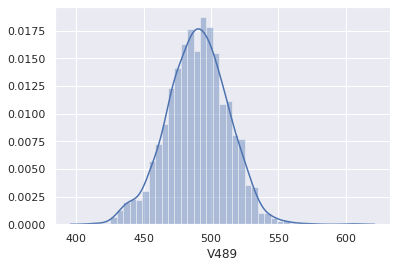

In [8]:
import scipy.stats as stats
import pylab 

col1 =  choice(Xchallenge.columns) # on choisit une variable au hasard

sns.set(style="darkgrid")
sns.distplot(Xchallenge[col1])

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([411, 417, 422, ..., 566, 574, 606])),
 (22.720360078537862, 489.9115, 0.9983326018153609))

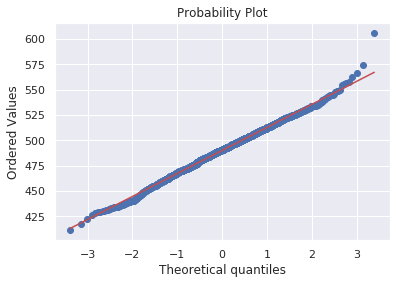

In [9]:
stats.probplot(Xchallenge[col1], dist="norm", plot=pylab)

In [10]:
from scipy.stats import shapiro

stat, p = shapiro(Xchallenge[col1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('la variable semble être Gaussien (on ne rejette pas H0)')
else:
    print('La variable ne semble pas être Gaussien (On rejette H0)')

Statistics=0.997, p=0.001
La variable ne semble pas être Gaussien (On rejette H0)


In [11]:
nombre_de_variable_gaussienne = 0

for col in list(Xchallenge.columns):
    stat, p = shapiro(Xchallenge[col])
    
    if p < 0.05:
        nombre_de_variable_gaussienne += 1
        
print("Nombre de variables non gaussiennes par le test de Shapiro: ",nombre_de_variable_gaussienne)

Nombre de variables non gaussiennes par le test de Shapiro:  210


In [12]:
# g = sns.pairplot(Xchallenge, vars=sample(list(Xchallenge.columns), 15)) # on représente 15 variable au hasard 2 à 2
# g

In [16]:
EcratType = 2.5

Col = Xchallenge.std() < EcratType
Col = [i for i in Col.index if Col[i]==True]

Col = list(set(Col))
print("Il y'a",len(Col),"variables avec un écart type inférieur à 2.5")
print("Nous décidons de les écarter car elles n'apportent aucune information(variance)")

Il y'a 44 variables avec un écart type inférieur à 5
Nous décidons de les écarter car elles n'apportent aucune information(variance)


In [17]:
Xchallenge = Xchallenge[Col] # on supprime les variables avec une faible variance

### Feature Scaling

In [22]:
scaler = StandardScaler()
Xchallenge_scaled = scaler.fit_transform(Xchallenge)

Xchallenge_scaled = pd.DataFrame(Xchallenge_scaled, columns=list(Xchallenge.columns))

In [ ]:
# Col_train = Xtrainchallenge.std() > 1.5
# Col_train = [i for i in Col_train.index if Col_train[i]==True]

# Xtrainchallenge = Xtrainchallenge[Col_train]
# Xtestchallenge = Xtestchallenge[Col_train]

# X_train, X_test, y_train, y_test = train_test_split(Xtrainchallenge,Ytrainchallenge,test_size = 0.3)


# start = time.time()

# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.001, 0.005],
#     "min_samples_leaf": [0.001, 0.005, 0.01, 0.01, 0.05],
#     "max_features": [1., "sqrt"]
#     }

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_DT.fit(X_train, y_train)

# end=time.time()
# train_time_dec=end-start

# print("Train: ",clf_DT.score(X_train, y_train))
# print("Test: ",clf_DT.score(X_test, y_test))
# print("\n")
# print(clf_DT.best_params_)

In [ ]:
# Xtrainchallenge = Xtrainchallenge[Col_train]
# Xtestchallenge = Xtestchallenge[Col_train]

# X_train, X_test, y_train, y_test = train_test_split(Xtrainchallenge,Ytrainchallenge,test_size = 0.3)




# start = time.time()

# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.001, 0.005],
#     "min_samples_leaf": [0.001, 0.005, 0.01, 0.01, 0.05],
#     "max_features": [1., "sqrt"]
#     }

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_DT.fit(X_train, y_train)

# end=time.time()
# train_time_dec=end-start

# print("Train: ",clf_DT.score(X_train, y_train))
# print("Test: ",clf_DT.score(X_test, y_test))
# print("\n")
# print(clf_DT.best_params_)

In [ ]:
# # On regarde la matrice de corrélation
# fig = plt.figure(1, figsize=(50, 50))

# # sns.heatmap(round(Xtrainchallenge.corr(),2), cmap=sns.diverging_palette(20, 220, n=200), fmt=".2f")
# plt.show()

In [ ]:
# print ("Lignes: " ,Xtrainchallenge.shape[0])
# print ("Colonnes: " ,Xtrainchallenge.shape[1])

## 2. Modèles de prédiction

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# start = time.time()

# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.001, 0.005],
#     "min_samples_leaf": [0.001, 0.005, 0.01, 0.01, 0.05],
#     "max_features": [1., "sqrt"]
#     }

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_DT.fit(X_train, y_train)

# end=time.time()
# train_time_dec=end-start

# print("Train: ",clf_DT.score(X_train, y_train))
# print("Test: ",clf_DT.score(X_test, y_test))
# print("\n")
# print(clf_DT.best_params_)

In [ ]:
# X_train = Xtrainchallenge
# X_test = Xtestchallenge
# y_train = Ytrainchallenge

In [ ]:
# n_components = 150

# # TODO: Create an instance of PCA, initializing with n_components=n_components and whiten=True
# pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

# #TODO: pass the training dataset (X_train) to pca's 'fit()' method
# pca = pca.fit(X_train)

In [ ]:
# print("proportion de variance associée aux 10 premiéres axes:\n",pca.explained_variance_ratio_[:100])

In [ ]:
# print("proportion total de variance associées aux axes: ",round(sum(pca.explained_variance_ratio_),4))

In [ ]:
#Apply dimensionality reduction to X.
# X_train_pca = pca.transform(X_train)
# X_test_pca = pca.transform(X_test)

#### a. LogisticRegression

In [ ]:
# y_pred_Logit = Logit_gscv.predict(X_test)

In [ ]:
# np.savetxt('WADE_premier_test.txt', np.transpose(y_pred_Logit))
# y_pred_Logit = Logit_gscv.predict(X_test)

## Informations sur les données de Test 

In [ ]:
# variance = 10

# Col_train = Xtrainchallenge.std() > variance
# Col_train = [i for i in Col_train.index if Col_train[i]==True]

# Col_test = Xtestchallenge.std() > variance
# Col_test = [i for i in Col_test.index if Col_test[i]==True]

# Col = list(set(Col_train) & set(Col_test))
    
# Xtrainchallenge = Xtrainchallenge[Col]
# Xtestchallenge = Xtestchallenge[Col]

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# variance = 10

# Col_train = Xtrainchallenge.std() > variance
# Col_train = [i for i in Col_train.index if Col_train[i]==True]

# Col_test = Xtestchallenge.std() > variance
# Col_test = [i for i in Col_test.index if Col_test[i]==True]

# Col = list(set(Col_train) & set(Col_test))
    
# Xtrainchallenge = Xtrainchallenge[Col]
# Xtestchallenge = Xtestchallenge[Col]
    
    
# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.005, 0.01],
#     "min_samples_leaf": [0.005, 0.01, 0.02],
#     "min_impurity_decrease" : [0.001,0.0015,0.002,0.005,0.01],
#     "max_features": [0.5, 0.75, 1., "sqrt"]
# }

# clf_DT_final = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=5)

# clf_DT_final.fit(Xtrainchallenge, Ytrainchallenge)

In [ ]:
# print(clf_DT_final.best_params_)

# print("Train: ",clf_DT_final.score(Xtrainchallenge, Ytrainchallenge))
# y_test_final = clf_DT_final.predict(Xtestchallenge)

# np.savetxt('WADE_ArbreDecision_version_2.txt', np.transpose(y_test_final),fmt='% 0d')

In [ ]:
# Precision_test = {}
# Precision_train = {}

# Precision_final = {}

# from sklearn.tree import DecisionTreeClassifier

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=1)

# for size in np.linspace(0.05, 0.95, 19):
#     print(size,":")
#     X_train, X_test, y_train, y_test = train_test_split(Xtrainchallenge,Ytrainchallenge,test_size = size)
    
#     clf_DT.fit(X_train, y_train)
    
#     print("\n")
#     Precision_train[size] = round(clf_DT.score(X_train, y_train),2)
#     Precision_test[size]  = round(clf_DT.score(X_test, y_test),2)
    
#     y_pred = clf_DT.predict(Xtestchallenge)
    
#     Precision_final[size] = f1_score(y_test_final, y_pred, average='micro')

In [ ]:
# Precision_test

In [ ]:
# Precision_train

In [ ]:
# plt.plot(list(Precision_train.keys()), list(Precision_train.values()), 'r-',  label='train')
# plt.plot(list(Precision_test.keys()), list(Precision_test.values()), 'b-', label='test')
# plt.legend()
# plt.show()

In [ ]:
# Precision_final

In [ ]:
# plt.plot(list(Precision_final.keys()), list(Precision_final.values()), '-', label='F1 Score')
# plt.legend()
# plt.show()

In [ ]:
# Doonees_Test = pd.DataFrame({
#     'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting','XGBoost'],
#     'Accuracy_score': [as_dt, as_rf, as_grad, as_xgrad],
#     'Matrice de confusion': [cm_dt, cm_rf, cm_grad, cm_xgrad],
#     "F1 [macro,micro, weighted]": [f1_dt, f1_rf, f1_grad, f1_xgrad]})
    
# models_cross.sort_values(by='Accuracy_score', ascending=False)

In [ ]:
# y_dt = clf_DT.predict(X_test)
# confusion_matrix(y_test, y_dt)

In [ ]:
# # construire la courbe ROC

# fpr, tpr, thr = metrics.roc_curve(y_test, y_dt)

# # calculer l'aire sous la courbe ROC
# auc = metrics.auc(fpr, tpr)

# # créer une figure

# fig = plt.figure(figsize=(7,7))

# # afficher la courbe ROC
# plt.plot(fpr, tpr, '-', lw=2, label='AUC=%.2f' % auc)

# # donner un titre aux axes et au graphique
# plt.xlabel('False Positive Rate', fontsize=16)
# plt.ylabel('True Positive Rate', fontsize=16)
# plt.title('Courbe ROC Décision Tree', fontsize=16)

# # afficher la légende
# plt.legend(loc="lower right", fontsize=14)

# # afficher l'image
# plt.show()

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# Score_test = {}
# Score_train = {}


# for variance in range(20):
#     print("\nVariance",variance)
    
#     Col_train = Xtrainchallenge.std() > variance
#     Col_train = [i for i in Col_train.index if Col_train[i]==True]

#     Col_test = Xtestchallenge.std() > variance
#     Col_test = [i for i in Col_test.index if Col_test[i]==True]

#     Col = list(set(Col_train) & set(Col_test))
    
#     Xtrainchallenge = Xtrainchallenge[Col]
#     Xtestchallenge = Xtestchallenge[Col]
    
#     X_train, X_test, y_train, y_test = train_test_split(Xtrainchallenge,Ytrainchallenge,test_size = 0.1)
    
#     parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.001, 0.005],
#     "min_samples_leaf": [0.001, 0.005, 0.01, 0.01, 0.05],
#     "max_features": [1., "sqrt"]
#     }

#     clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=1)

#     clf_DT.fit(X_train, y_train)
    
#     print("Train: ",clf_DT.score(X_train, y_train))
#     print("Test: ",clf_DT.score(X_test, y_test))
    
#     Score_test[variance] = round(clf_DT.score(X_test, y_test),2)
#     Score_train[variance] = round(clf_DT.score(X_train, y_train),2)


In [ ]:
# Score_test

In [ ]:
# Score_train

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# variance = 1

# Col_train = Xtrainchallenge.std() > variance
# Col_train = [i for i in Col_train.index if Col_train[i]==True]

# Col_test = Xtestchallenge.std() > variance
# Col_test = [i for i in Col_test.index if Col_test[i]==True]

# Col = list(set(Col_train) & set(Col_test))
    
# Xtrainchallenge = Xtrainchallenge[Col]
# Xtestchallenge = Xtestchallenge[Col]
    
    
# parameters = {
#     "criterion": ["gini", "entropy"],
#     "max_depth":[3, 5, 8, 10],
#     "min_samples_split": [2, 0.001, 0.005],
#     "min_samples_leaf": [0.001, 0.005, 0.01, 0.01, 0.05],
#     "max_features": [1., "sqrt"]
# }

# clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_DT.fit(Xtrainchallenge, Ytrainchallenge)
    
# print("Train: ",clf_DT.score(Xtrainchallenge, Ytrainchallenge))

# y_pred = clf_DT .predict(Xtestchallenge)

In [ ]:
# y_pred = clf_DT .predict(Xtestchallenge)
# np.savetxt('WADE_ArbreDecision.txt', np.transpose(y_pred),fmt='% 0d')

### XGBoost

In [ ]:
# variance = 9

# Col_train = Xtrainchallenge.std() > variance
# Col_train = [i for i in Col_train.index if Col_train[i]==True]

# Col_test = Xtestchallenge.std() > variance
# Col_test = [i for i in Col_test.index if Col_test[i]==True]

# Col = list(set(Col_train) & set(Col_test))

# Xtrainchallenge = Xtrainchallenge[Col]
# Xtestchallenge = Xtestchallenge[Col]

In [ ]:
# #instantiate model and train

# n_estimators = [100, 200, 300, 400, 500]
# learning_rate = [0.0001, 0.001, 0.01, 0.1]
# myXGBoost = XGBClassifier(learning_rate = 0.005, n_estimators=400, max_depth=8)
# eval_set = [(X_test, y_test)]
# eval_metric = ["auc","error","logloss"]
# myXGBoost.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="error", eval_set=eval_set, verbose=True)

In [ ]:
# # make predictions for test set
# y_pred = myXGBoost.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.))

In [ ]:
# from xgboost import XGBClassifier

# parameters = {
#     "eta" : [0.1, 0.6],
#     "gamma" : [0.1, 0.66],
#     "subsample": [0.5, 1.0],
#     "colsample_bytree": [0.5, 1.0],
#     "learning_rate": [0.001, 0.01],
#     "min_samples_leaf": [0.01],
#     "max_depth":[8,10],
#     "max_features":[0.5, 1.0],
#     "n_estimators" : [500],
#     }

                
# clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# eval_set = [(Xtrainchallenge, Ytrainchallenge)]
                    
# clf_XGB.fit(Xtrainchallenge, Ytrainchallenge, early_stopping_rounds=25, eval_metric="auc", eval_set=eval_set, verbose=True)

In [ ]:
# print("Train: ",clf_XGB.score(Xtrainchallenge, Ytrainchallenge))
# print("\n")
# print(clf_XGB.best_params_)

In [ ]:
# # save the model to disk
# filename = 'modeles/clf_XGBOOST_3'
# joblib.dump(clf_XGB, filename)

In [ ]:
# y_pred_XGB = clf_XGB.predict(Xtestchallenge)
# np.savetxt('WADE_XGBoost_Version_3.txt', np.transpose(y_pred_XGB),fmt='% 0d')

In [ ]:


# parameters = {
#     "loss":["deviance", "exponential"],
#     "learning_rate": [0.001, 0.01],
#     "min_samples_leaf": [0.00010.01],
#      "min_samples_split" : [2, 10],
#      "min_impurity_decrease" : [0.00.005], 
#     "max_depth":[8, 10],
#     "max_features":["sqrt"],
#     "criterion": ["friedman_mse"],
#     "subsample":[0.5, 1],
#     "n_estimators":[500],
#     }
        
# clf_GB = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# clf_GB.fit(Xtrainchallenge, Ytrainchallenge)

# print("Train: ",clf_GB.score(Xtrainchallenge, Ytrainchallenge))
# print("\n")
# print(clf_GB.best_params_)

In [ ]:
# y_pred = clf_GB.predict(Xtestchallenge)
# np.savetxt('WADE_GradientBoosting_Version_2.txt', np.transpose(y_pred),fmt='% 0d')

In [ ]:
# # save the model to disk
# filename = 'modeles/clf_GB_2'
# joblib.dump(clf_GB, filename)

# # # load the model from disk
# # loaded_model = joblib.load('modeles/clf_GB_2')

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [ ]:
# X = X_train
# Xcv= X_test 
# y = y_train
# ycv =  y_test

# from sklearn.metrics import accuracy_score
# from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
# import numpy as np
# import xgboost as xgb

# def objective(space):
#     # Instantiate the classifier
#     clf = xgb.XGBClassifier(n_estimators = space['n_estimators'],
#                             eta = space['eta'],
#                             alpha = space['alpha'],
#                             colsample_bytree=space['colsample_bytree'],
#                             learning_rate = .01,
#                             max_depth = int(space['max_depth']),
#                             min_child_weight = space['min_child_weight'],
#                             subsample = space['subsample'],
#                             gamma = space['gamma'],
#                             reg_lambda = space['reg_lambda'])
    
    
#     eval_set  = [( X, y), ( Xcv, ycv)]
    
#     # Fit the classsifier
#     clf.fit(X, y,
#             eval_set=eval_set, eval_metric="auc",
#             early_stopping_rounds=20,verbose=False)
    
#     # Predict on Cross Validation data
#     pred = clf.predict(Xcv)
    
#     # Calculate our Metric - accuracy
#     accuracy = accuracy_score(ycv, pred)
    
# # return needs to be in this below format. We use negative of accuracy since we want to maximize it.
#     return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
# space = {
#         'n_estimators': hp.quniform('n_estimators', 200, 600, 1),
#         'eta': hp.quniform('eta', 0.005, 0.2, 0.025), # A problem with max_depth casted to float instead of int with the hp.quniform method.
#         'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
#         'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
#         'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
#         'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
#         'colsample_bytree': hp.quniform('colsample_bytree', 0.7, 1, 0.05),
#         'alpha' :  hp.quniform('alpha', 0, 10, 1),
#         'lambda': hp.quniform('lambda', 1, 2, 0.1),
#         'objective': 'binary:logistic',
#         'booster': 'gbtree',
#         'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1)
# }

In [ ]:
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=100,
#             trials=trials)
# print(best)

In [ ]:
variance = 1

Col_train = Xtrainchallenge.std() > variance
Col_train = [i for i in Col_train.index if Col_train[i]==True]

Col_test = Xtestchallenge.std() > variance
Col_test = [i for i in Col_test.index if Col_test[i]==True]

Col = list(set(Col_train) & set(Col_test))

Xtrainchallenge = Xtrainchallenge[Col]
Xtestchallenge = Xtestchallenge[Col]

X_train, X_test, y_train, y_test = train_test_split(Xtrainchallenge,Ytrainchallenge,test_size = 0.3)

In [ ]:
# import xgboost as xgb

# submission = y_test

# def objective(space):

#     warnings.filterwarnings(action='ignore', category=DeprecationWarning)
#     classifier = xgb.XGBClassifier(n_estimators = space['n_estimators'],
#                             max_depth = int(space['max_depth']),
#                             learning_rate = space['learning_rate'],
#                             gamma = space['gamma'],
#                             min_child_weight = space['min_child_weight'],
#                             subsample = space['subsample'],
#                             colsample_bytree = space['colsample_bytree']
#                             )
    
#     classifier.fit(X_train, y_train)

#     # Applying k-Fold Cross Validation
#     from sklearn.model_selection import cross_val_score
    
#     accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
#     CrossValMean = accuracies.mean()

#     print("CrossValMean:", CrossValMean)

#     return{'loss':1-CrossValMean, 'status': STATUS_OK }


# space = {
#     'max_depth' : hp.choice('max_depth', range(5, 12, 1)),
#     'learning_rate' : hp.quniform('learning_rate', 0.005, 0.1, 0.05),
#     'n_estimators' : hp.choice('n_estimators', range(300, 700, 100)),
#     'gamma' : hp.quniform('gamma', 0, 0.50, 0.01),
#     'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
#     'subsample' : hp.quniform('subsample', 0.1, 1, 0.01),
#     'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01)}



# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=100,
#             trials=trials)

# print("Best: ", best)


# # Fitting XGBoost to the Training set
# from xgboost import XGBClassifier
# classifier = XGBClassifier(n_estimators = best['n_estimators'],
#                             max_depth = best['max_depth'],
#                             learning_rate = best['learning_rate'],
#                             gamma = best['gamma'],
#                             min_child_weight = best['min_child_weight'],
#                             subsample = best['subsample'],
#                             colsample_bytree = best['colsample_bytree']
#                             )

In [ ]:
# classifier.fit(X_train, y_train)

# # Applying k-Fold Cross Validation
# from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# CrossValMean = accuracies.mean()
# print("Final CrossValMean: ", CrossValMean)

# CrossValSTD = accuracies.std()

In [ ]:
# # make predictions for test set
# y_pred = classifier.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.))

In [ ]:
# from sklearn.metrics import roc_auc_score
# import xgboost as xgb
# from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# testXtr = X_train
# testytr = y_train
# testXv = X_test
# testyv = y_test
                    
# def objective(space):

#     clf = xgb.XGBClassifier(n_estimators = space['n_estimators'], 
#                     max_depth = space['max_depth'],
#                     min_child_weight = space['min_child_weight'],
#                     learning_rate = space['learning_rate'],
#                     gamma = space['gamma'],
#                     colsample_bytree = space['colsample_bytree'],
#                     subsample = space['subsample'])

#     eval_set  = [( testXtr, testytr), ( testXv, testyv)]

#     clf.fit(testXtr, testytr,
#         eval_set=eval_set, eval_metric="auc", 
#         early_stopping_rounds=30)

#     pred = clf.predict(testXv)
#     auc = roc_auc_score(testyv, pred)
#     print("SCORE:", auc)

#     return{'loss':1-auc, 'status': STATUS_OK }

# space = {
#     'max_depth' : hp.choice('x_max_depth', range(5, 12, 1)),
#     'learning_rate' : hp.quniform('x_learning_rate', 0.005, 0.1, 0.05),
#     'n_estimators' : hp.choice('x_n_estimators', range(300, 700, 100)),
#     'gamma' : hp.quniform('x_gamma', 0, 0.50, 0.01),
#     'min_child_weight': hp.choice('x_min_child_weight', np.arange(1, 10, dtype=int)),
#     'subsample' : hp.quniform('x_subsample', 0.1, 1, 0.01),
#     'colsample_bytree' : hp.quniform('x_colsample_bytree', 0.1, 1.0, 0.01)}


# best = fmin(fn=objective,
#     space=space,
#     algo=tpe.suggest,
#     max_evals = 30)

# print(best)

In [ ]:
# # make predictions for test set
# y_pred = classifier.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.))

## Conclusion:

In [ ]:
from sklearn.model_selection import cross_val_score

def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,100))
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': 1-acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=1000, trials=trials)
print('best:')
print(best)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# make predictions for test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.))